1/1 [==============================] - 0s 283ms/step
The car is damaged (Confidence: 1.00).


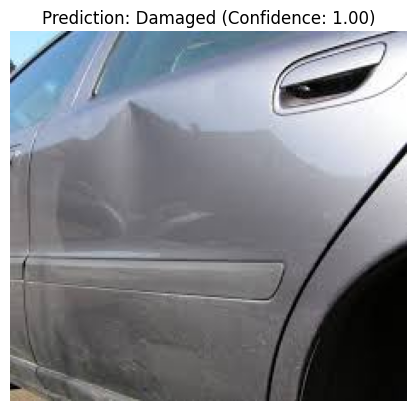

Found 4000 images belonging to 1 classes.
1/1 [==============================] - 0s 235ms/step


c:\Users\Pc\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 335ms/step


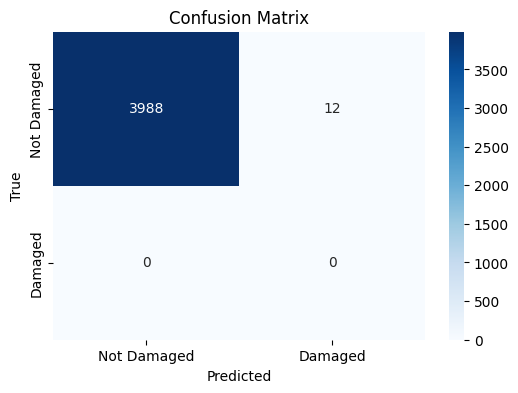

              precision    recall  f1-score   support

 Not Damaged       1.00      1.00      1.00      4000
     Damaged       0.00      0.00      0.00         0

    accuracy                           1.00      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       1.00      1.00      1.00      4000



c:\Users\Pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load the saved model
model = tf.keras.models.load_model("car_damage_model.h5")

# Function to preprocess the image
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Load and resize image
    img_array = image.img_to_array(img)                       # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)            # Add batch dimension
    img_array = img_array / 255.0                             # Normalize the image
    return img_array

# Function to make prediction
def predict_damage(img_path, threshold=0.5):
    img_array = prepare_image(img_path)
    prediction = model.predict(img_array)                      # Make prediction
    return prediction[0][0], prediction[0][0] > threshold     # Return prediction value and class label

# Function to evaluate model performance
def evaluate_model(validation_generator):
    y_true = validation_generator.classes
    y_pred = []
    
    # Make predictions on validation data
    for i in range(len(validation_generator)):
        X, _ = validation_generator[i]
        preds = model.predict(X)
        y_pred.extend(preds > 0.5)  # Binary threshold at 0.5
    
    # Convert predictions to binary labels
    y_pred = np.array(y_pred).astype(int).flatten()
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Damaged', 'Damaged'], yticklabels=['Not Damaged', 'Damaged'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Classification Report
    print(classification_report(y_true, y_pred, target_names=['Not Damaged', 'Damaged']))

# Example usage: Predict a single image
img_path = "C:\\Users\\Pc\\OneDrive\\Desktop\\car_damage\\damage_severity\\training\\01-minor\\0001.JPEG"
prediction_value, is_damaged = predict_damage(img_path, threshold=0.5)

# Print the result
if is_damaged:
    print(f"The car is damaged (Confidence: {prediction_value:.2f}).")
else:
    print(f"The car is not damaged (Confidence: {prediction_value:.2f}).")

# Display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title(f'Prediction: {"Damaged" if is_damaged else "Not Damaged"} (Confidence: {prediction_value:.2f})')
plt.axis('off')  # Hide axes
plt.show()

# Example usage: Evaluate on validation data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

validation_dir = 'car_detect'  # Replace with your validation directory path

# Prepare the validation data generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Evaluate model performance on validation set
evaluate_model(validation_generator)
